# Introduction to Recommendation Engines
  
We’ve come to expect personalized experiences online—whether it’s Netflix recommending a show or an online retailer suggesting items you might also like to purchase. But how are these suggestions generated? In this course, you’ll learn everything you need to know to create your own recommendation engine. Through hands-on exercises, you’ll get to grips with the two most common systems, collaborative filtering and content-based filtering. Next, you’ll learn how to measure similarities like the Jaccard distance and cosine similarity, and how to evaluate the quality of recommendations on test data using the root mean square error (RMSE). By the end of this course, you’ll have built your very own movie recommendation engine and be able to apply your Python skills to create these systems for any industry.
  
What problems are recommendation engines designed to solve and what data are best suited for them? Discern what insightful recommendations can be made even with limited data, and learn how to create your own recommendations.


## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>DataFrame.nunique()</td>
    <td>Count distinct elements in each column</td>
  </tr>
  <tr>
    <td>2</td>
    <td>DataFrame.hist()</td>
    <td>Create histograms for numeric columns</td>
  </tr>
  <tr>
    <td>3</td>
    <td>DataFrame.drop()</td>
    <td>Drop specified labels from rows or columns</td>
  </tr>
  <tr>
    <td>4</td>
    <td>DataFrame.value_counts()</td>
    <td>Count unique values in a Series</td>
  </tr>
  <tr>
    <td>5</td>
    <td>DataFrame.groupby()</td>
    <td>Group DataFrame using a mapper or by a Series of columns</td>
  </tr>
  <tr>
    <td>6</td>
    <td>DataFrame.sort_values()</td>
    <td>Sort DataFrame by one or more columns</td>
  </tr>
  <tr>
    <td>7</td>
    <td>DataFrame.index</td>
    <td>Get the index (row labels) of the DataFrame</td>
  </tr>
  <tr>
    <td>8</td>
    <td>DataFrame.isin()</td>
    <td>Check whether each element in the DataFrame is contained in a list-like object</td>
  </tr>
  <tr>
    <td>9</td>
    <td>itertools.permutations()</td>
    <td>Generate all permutations of an iterable</td>
  </tr>
  <tr>
    <td>10</td>
    <td>DataFrame.apply()</td>
    <td>Apply a function along an axis of the DataFrame</td>
  </tr>
  <tr>
    <td>11</td>
    <td>DataFrame.size()</td>
    <td>Return the number of elements in the DataFrame</td>
  </tr>
  <tr>
    <td>12</td>
    <td>DataFrame.reset_index()</td>
    <td>Reset the index of the DataFrame</td>
  </tr>
  <tr>
    <td>13</td>
    <td>.to_frame()</td>
    <td>Convert a Series to a DataFrame</td>
  </tr>
  <tr>
    <td>14</td>
    <td>str.contains()</td>
    <td>Check if each element in a Series or DataFrame column contains a substring</td>
  </tr>
  <tr>
    <td>15</td>
    <td>DataFrame.empty</td>
    <td>Check if the DataFrame is empty (contains no rows or columns)</td>
  </tr>
</table>

  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [1]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations

# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)

# Setting a standard style
plt.style.use('ggplot')

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', 50)

## What are recommendation engines?
  
Whether you realize it or not, recommendations drive so many of our decisions on a daily basis. Be it obvious recommendations such as suggestions of new restaurants from friends, or a certain model of camera discussed in a blog, to less direct recommendations such as Netflix promoting shows you are likely to enjoy, or Amazon proposing other purchases that go well with what you are buying. In this course, we will focus on this second group of data-driven recommendations.
  
<center><img src='../_images/what-are-recommendation-engines.png' alt='img' width='740'></center>
  
**What kind of data do I need?**
  
Recommendation engines use the feedback of users to find new relevant items for them or for others with the assumption that users who have similar preferences in the past are likely to have similar preferences in the future like the example here. Recommendation engines benefit from having a many to many match between the users giving the feedback, and the items receiving the feedback. In other words, a better recommendation can be made for an item that has been given a lot of feedback, and more personalized recommendations can be given for a user that has given a lot of feedback.
  
<center><img src='../_images/what-are-recommendation-engines1.png' alt='img' width='740'></center>
  
**What kind of data do I need?**
  
As we see in the table here, users have rated multiple items, and each item has been rated by multiple users. This allows us to find users with similar preferences. This is valuable as users who have similar tastes in the past are likely to have similar tastes in the future.
  
<center><img src='../_images/what-are-recommendation-engines2.png' alt='img' width='740'></center>
  
**What are recommendation engines useful for?**
  
When should you use a recommendation engine? Machine learning can be used for many different kinds of predictions, from whether a stock price will increase, to detecting criminals laundering money. Recommendation engines target a specific kind of machine learning problem, they are designed to suggest a product, service, or entity to a user based on other users, and their own feedback. Let's take some examples. Making a suggestion as to what movie a user would like based on what genres of movies they have ranked highly in the past would be suited to a recommendation engine. Predicting whether that movie will do well in the box office on the other hand would be better suited to a different kind of statistical model. Predicting whether a user would enjoy a restaurant based on where they have enjoyed in the past could be performed with a recommendation engine. Predicting how much a house in the same area as the restaurant would cost based on its size and historic house prices would not.
  
<center><img src='../_images/what-are-recommendation-engines3.png' alt='img' width='740'></center>
  
**Implicit vs. explicit data**
  
Hopefully, you are beginning to see that recommendation engines rely on data that records the preferences of users. How these preferences are measured fall into two main groups, implicit and explicit. Explicit data contains direct feedback from a user as to how they feel about an item such as a numerical rating, or upvoting or downvoting. Take a dataset where users rate a restaurant out of 5 stars like Yelp, the feedback from the user is explicitly recorded. Implicit data relies not on a user's direct rating but instead uses the user's actions to summarise their preferences such as users choosing to watch certain programs, or having a specific purchase history. A user's historic choice of music on Spotify is a good example of this, based on what songs someone has listened to, you can infer what kind of music they enjoy. Here are some other examples of explicit and implicit feedback.
  
<center><img src='../_images/what-are-recommendation-engines4.png' alt='img' width='740'></center>
  
**Let's practice!**
  
Now we have covered the basics, let's check whether you have learned when recommendation engines might be used and what data is best suited to them!

### Identifying the correct data for recommendation engines
  
Sometimes whether a problem is suited to using a recommendation engine versus using a different statistical model will rely on the data available.
  
Two datasets, `restaurant_data_1` (detailing the sanitation rating a set of restaurants has received from the health inspector) and `restaurant_data_2` (containing customers' ratings of restaurants), have already been loaded for you.
  
Inspect both DataFrames in the console and select which is most applicable to a recommendation problem.
  
In this exercise and for the rest of the course, `pandas` will be loaded by default with the alias `pd`.
  
---
  
Possible answers
  
- [x] `restaurant_data_2`
- [ ] `restaurant_data_1`
- [ ] Neither `restaurant_data_1` nor `restaurant_data_2`.
- [ ] Both `restaurant_data_1` and `restaurant_data_2`.



In [2]:
# Printing heads for the question above
restaurant_data_1 = pd.read_csv('../_datasets/resturant_data_1.csv')
print(restaurant_data_1.shape)
restaurant_data_1.head()

(20, 4)


,Resturant_Name,Type,Price_Range,Health_Rating
0,Island Grill,American,$,A
1,Flavoroso,Bakery,$$$,A
2,Green Curry,Thai,$,A
3,El Pirata Porch,Mexican,$,A
4,Sweet Escape,Bakery,$$,B


In [3]:
# Printing heads for the question above
restaurant_data_2 = pd.read_csv('../_datasets/resturant_data_2.csv')
print(restaurant_data_2.shape)
restaurant_data_2.head()

(20, 5)


,Reviewer_ID,Resturant_Name,Type,Price_Range,Review (out of 5)
0,Reviewer_A,Island Grill,American,$,4.5
1,Reviewer_A,Flavoroso,Bakery,$$$,1.7
2,Reviewer_A,Green Curry,Thai,$,2.2
3,Reviewer_A,El Pirata Porch,Mexican,$,0.2
4,Reviewer_B,Island Grill,American,$,5.0


Correct! `restaurant_data_2` contains reviews that detail how customers have ranked different restaurants. This data would be great for recommending new restaurants to customers based on their tastes. What makes this particularly useful is that users have given multiple ratings, and restaurants have received ratings from many different customers.

### Implicit vs. explicit data
  
As mentioned in the video exercise, feedback used in recommendation engines can be explicit or implicit.
  
The dataset `listening_history_df` has been loaded for you. This dataset contains columns identifying the users, the songs they listen to, along with:
  
- `Skipped Track`: A Boolean column recording whether the user skipped the song or listened to it to the end.
- `Rating`: The score out of 10 the user gave the song.
  
In this exercise, you will explore the data and from this exploration identify which columns best reflect explicit feedback versus implicit feedback.
  
---
  
1. Inspect the first 5 rows of `listening_history_df`.
2. Print the number of unique values in the `Rating` and `Skipped Track` columns.
3. Display a histogram of the values in the `Rating` column
4. From the provided description and your exploration of the data, select which of its columns would be considered explicit data.
  
Possible answers
  
---
- [ ] User
- [ ] Skipped Track
- [x] Rating
- [ ] None of the columns could be used.
  
Correct! A rating is a good example of explicit data as it required the user to directly give feedback, while their dislike for a song is only implied by the action of them skipping it before it ends.

In [4]:
# Loading df
listening_history_df = pd.read_csv('../_datasets/listening_history_small.csv')
print(listening_history_df.shape)
listening_history_df.head()

(35, 4)


,User,Song Title,Skipped Track,Rating
0,User_001,Like a Rolling Stone,True,6
1,User_001,Imagine,False,2
2,User_001,What's Going On,False,9
3,User_002,Respect,False,6
4,User_003,Good Vibrations,True,0


       User            Song Title  Skipped Track  Rating
0  User_001  Like a Rolling Stone           True       6
1  User_001               Imagine          False       2
2  User_001       What's Going On          False       9
3  User_002               Respect          False       6
4  User_003       Good Vibrations           True       0
Rating           11
Skipped Track     2
dtype: int64


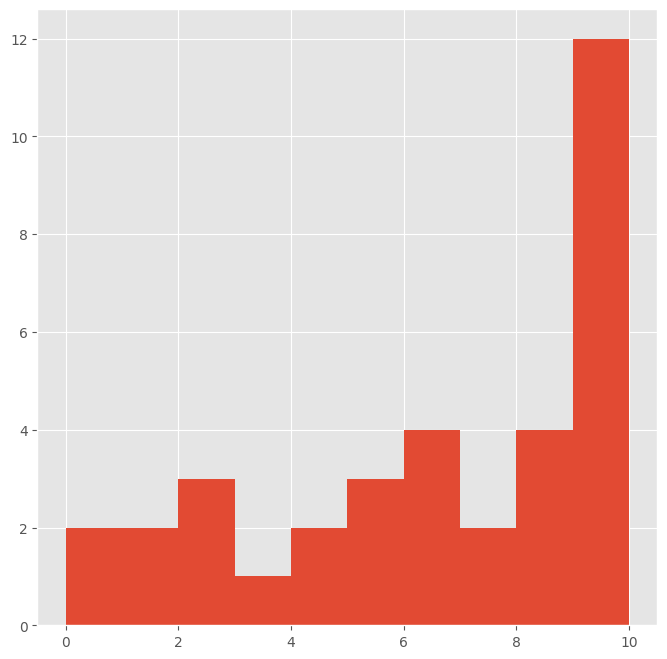

In [5]:
# Inspect the listening_history_df DataFrame
print(listening_history_df.head())

# Calculate the number of unique values
print(listening_history_df[['Rating', 'Skipped Track']].nunique())

# Display a histogram of the values in the Rating column
listening_history_df['Rating'].hist()
plt.show()

## Non-personalized recommendations
  
The first type of recommendations we will generate are called non-personalized recommendations. They are called this as they are made to all users, without taking their preferences into account.
  
**Non-personalized ratings**
  
One example is recommending the items most frequently seen together like you can see here on Amazon. This might not select the 'best' items or items that are most suited to you, but there is a good chance you will not hate them as they are so common.
  
<center><img src='../_images/non-personalized-recommendations.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
We can demonstrate how to find this with Python using this book rating DataFrame shown here. Each row corresponds to an instance of a reader completing a book with the book title stored in the book column.
  
<center><img src='../_images/non-personalized-recommendations1.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
By specifying the column of interest, "book" in this case, and using `pandas`' DataFrame `.value_counts()` method we obtain the counts of occurrences of each of the books, from highest to lowest.
  
<center><img src='../_images/non-personalized-recommendations2.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
We get just the names of the books by calling the `.index` value.
  
<center><img src='../_images/non-personalized-recommendations3.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
While this is a good start, we haven't incorporated any data about what readers thought about each book. Let's include that data here with an additional 'rating' column showing the reader's rating out of 5 for each book they read. We can use this to create alternative recommendations by finding the most highly rated books.
  
<center><img src='../_images/non-personalized-recommendations4.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
This is done by averaging the rating of each of the books and examining the highest-ranked ones. We select only the columns of interest (the title and the rating) and then specify which column we will be grouping by (the book title) We then find the mean of the groupby object using `.mean()`. This returns a DataFrame with a row per book and the average rating it receives. Unfortunately unlike `.value_counts()`, the `.groupby()` method does not automatically sort the output.
  
<center><img src='../_images/non-personalized-recommendations5.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
Therefore we will use the `.sort_values()` method, specifying that we want to sort by the ratings, in descending order (it is ascending by default). Examining the sorted DataFrame using the `.head()`, we now see the top values do indeed have very high ratings, but the books may look very unfamiliar. This is because items with very low numbers of ratings can skew the results. A book with only one rating has a solid chance of its only rating being 5 stars pushing it to the top, while a book that has been reviewed hundreds of times is likely to have at least one non-perfect review.
  
<center><img src='../_images/non-personalized-recommendations6.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
We can test our theory by seeing how many times the highest-ranked books have been reviewed. As predicted, they each occur only once in the dataset.
  
<center><img src='../_images/non-personalized-recommendations7.png' alt='img' width='740'></center>
  
**Finding the most liked popular items**
  
But by combining the initial work of counting occurrences with average ratings, we can get very useful recommendations. We can use the value_counts method once again to find the counts of occurrences and store them as book_frequency. We then cut down this Series by creating a mask of only books that have been reviewed more than one hundred times in our dataset and store as frequently_reviewed_books. Note the `.index` value is called here as we want the names of the books instead of the counts of their occurrences.
  
<center><img src='../_images/non-personalized-recommendations8.png' alt='img' width='740'></center>
  
**Finding the most liked popular items**
  
We then take a subset of our overall ratings DataFrame by selecting only the rows referring to books in frequently_reviewed_books using the `.isin()` method. This subset of reviews can now be used in the same way as earlier to find the highest rated books on average. Inspecting the result we now see that the top books no longer have full marks but are more recognizable titles.
  
<center><img src='../_images/non-personalized-recommendations9.png' alt='img' width='740'></center>
  
**Let's practice!**
  
Now let's put what we've learned to the test!

### Introduction to non-personalized recommendations
  
One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.
  
The DataFrame `user_ratings_df`, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.
  
---
  
1. Calculate the number of times each movie occurs in the dataset.
2. Print the titles of the top five most frequently seen movies.
3. Based on your analysis, what is the most frequently watched movie overall?
  
Possible answers
  
- [x] Forrest Gump
- [ ] Pulp Fiction
- [ ] The Matrix
- [ ] 329
  
Correct! Forrest Gump has been watched by 329 viewers in the dataset,and is the most viewed movie by far.

In [9]:
# Importing dataset
user_ratings_df = pd.read_csv('../_datasets/user_ratings.csv')
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
# Matching dataset to the exercise by dropping features that are not required
user_ratings_df = user_ratings_df.drop(['timestamp', 'genres'], axis=1)
user_ratings_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [11]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object', name='title')


### Improved non-personalized recommendations
  
Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. To understand how a viewer actually felt about a movie, more explicit data is useful. Thankfully, you also have ratings from each of the viewers in the Movie Lens dataset.
  
In this exercise, you will find the average rating of each movie in the dataset, and then find the movie with the highest average rating.
  
You will use the same `user_ratings_df` as you used in the previous exercise, which has been loaded for you.
  
---
  
1. Find the average rating for each of the movies and store it as a DataFrame called `average_rating_df`.
2. Sort the `average_rating_df` DataFrame by the average rating column from highest to lowest and store it as `sorted_average_ratings`.
3. Print the entries for the top five highest ranked movies in `sorted_average_ratings`.

In [12]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


Good work! Despite this being a real-world dataset, you might be surprised that the highest-ranked movies are not movies that most people have heard of. This is because very infrequently-viewed movies are skewing the results. You will address this issue in the next exercise.

### Combining popularity and reviews
  
In the past two exercises, you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their weaknesses.
  
Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.
  
In this exercise, you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.
  
---
  
1. Generate a list of the names of the movies appearing more than 50 times in `user_ratings_df` and store it as `popular_movies`.
2. Filter the original `user_ratings_df` DataFrame by the `popular_movies` list to create a `popular_movies_rankings` DataFrame and print the results.
3. Find the average rating given to the frequently watched films in `popular_movies_rankings` and store it as `popular_movies_average_rankings`.
4. Print the entries in `popular_movies_average_rankings` that contain the highest-ranked movies.

In [13]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Chasing Amy (1997)', 'Mystic River (2003)',
       'Grand Budapest Hotel, The (2014)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Training Day (2001)', 'Bad Boys (1995)',
       'Splash (1984)', 'Mulholland Drive (2001)',
       'The Devil's Advocate (1997)'],
      dtype='object', name='title', length=437)


In [15]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
popular_movies_rankings

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
79246,603,1997,4.0,"Exorcist, The (1973)"
79247,606,1997,3.0,"Exorcist, The (1973)"
79248,607,1997,5.0,"Exorcist, The (1973)"
79249,608,1997,4.5,"Exorcist, The (1973)"


In [16]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


Correct! You are now able to make intelligent non-personalized recommendations that combine both the ratings of an item and how frequently it has been interacted with.

## Non-personalized suggestions
  
While suggesting the highest-ranked items will generally return items that most people do not object to, it lacks any understanding of user tastes, or what items are liked by the same people.
  
**Identifying pairs**
  
In this video we will work through a third and final type of non-personalized recommendations, making suggestions by finding the most commonly seen together items. To do this we will use the same dataset as we previously used, with users and the books they read. We will record every time two books were read by the same person, and then count how often these pairings of books occur. We can then use this lookup table to suggest books that are often read by the same people, implying that if you like one, you are likely to enjoy the other.
  
<center><img src='../_images/non-personalized-suggestions.png' alt='img' width='740'></center>
  
**Permutations versus combinations**
  
We will be looking for all permutations of pairs, or in other words, counting both item_a paired with item_b and item_b paired with item_a separately. This will allow us to independently lookup items commonly seen with item_a, or items commonly seen with item_b.
  
<center><img src='../_images/non-personalized-suggestions1.png' alt='img' width='740'></center>
  
**Creating the pairing function**
  
We will need to first create a function that finds all permutations of pairs of items in a list it is applied to and apply the function to the sets of books each user has read. Let's go through this code in steps.
  
<center><img src='../_images/non-personalized-suggestions2.png' alt='img' width='740'></center>
  
**Creating the pairing function**
  
The `permutations()` function from the `itertools` package takes a list as its first argument, in this case, the list of books a user has read and takes the length of the permutations as its second argument, two in this case as we care about what books are read together.
  
<center><img src='../_images/non-personalized-suggestions3.png' alt='img' width='740'></center>
  
**Creating the pairing function**
  
We wrap this in a list as the permutation function returns an iterable object, while we want the actual list.
  
<center><img src='../_images/non-personalized-suggestions4.png' alt='img' width='740'></center>
  
**Creating the pairing function**
  
This list is then wrapped in a DataFrame for ease of use.
  
<center><img src='../_images/non-personalized-suggestions5.png' alt='img' width='740'></center>
  
**Applying the function to the data**
  
We can now apply this new function to our original DataFrame. DataFrame `.groupby()` objects have some built-in grouping functions, for example, dot mean, which you have used previously. However, custom functions are applied using the `.apply()` method. Here you can see the `.groupby()` being called on the book_df DataFrame with our custom function being applied using the `.apply()` method. This returns the correct data, but due to the `.groupby()`, it's a little difficult to read the nested index.
  
<center><img src='../_images/non-personalized-suggestions6.png' alt='img' width='740'></center>
  
**Cleaning up the results**
  
We will get rid of this index by using the `.reset_index()` method. As we no longer need any of the information about the user_ids we can set the `drop=` parameter to `True`. If we didn't do this, the index would just be converted to a column that we do not want.
  
<center><img src='../_images/non-personalized-suggestions7.png' alt='img' width='740'></center>
  
**Counting the pairings**
  
Having all these individual pairs is a great start, but we want to know how often each of these pairs occurs with each other We use a DataFrame `.groupby()` method again, this time grouping by both columns, and using the `.size()` method on the resulting groups to find how often each combination occurs. We then can then use the `.to_frame()` method to convert this into a DataFrame for ease of use. Resetting the index once more to clean up the `.groupby()` index.
  
<center><img src='../_images/non-personalized-suggestions8.png' alt='img' width='740'></center>
  
**Looking up recommendations**
  
Finally, we can sort the DataFrame so that we will find the most frequently seen together pairing for each book. With our newly sorted, cleaned up DataFrame we can find the most commonly paired book with it by filtering the book_a column by the name of the book we are looking for!
  
<center><img src='../_images/non-personalized-suggestions9.png' alt='img' width='740'></center>
  
**Let's practice!**
  
Now it's your turn to try this out on the movie dataset you have been working with.

### Finding all pairs of movies
  
In this exercise, you will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.
  
The `user_ratings_df` has been loaded once again containing users, and the movies they have seen.
  
You will need to first create a function that finds all possible pairs of items in a list it is applied to. For ease of use, you will output the values of this as a DataFrame. Since you only want to find movies that have been seen by the same person and not all possible permutations, you will group by `user_id` when applying the function.
  
---
  
1. Create a function called `find_movie_pairs` that finds all permutations of a Series, and stores the results as a DataFrame.
2. Apply this function to the `user_ratings_df` DataFrame and print the results.
3. Remove the nested index that has been created during the aggregation.

In [17]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)), columns=['movie_a', 'movie_b'])
  return pairs


# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs)

print(movie_combinations)

                         movie_a                           movie_b
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


In [18]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)), columns=['movie_a', 'movie_b'])
  return pairs


# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(
  find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


Perfect! You now have a clean table of all of the movies that were watched by the same user, which can be used to find the most commonly paired movies.

### Counting up the pairs
  
You can now create DataFrame of all the permutations of movies that have been watched by the same user. This is of limited use unless you can find which movies are most commonly paired.
  
In this exercise, you will work with the `movie_combinations` DataFrame that you created in the last exercise (that has been loaded for you), and generate a new DataFrame containing the counts of occurrences of each of the pairs within.
  
---
  
1. Find the number of times each pair of movies occurs and assign it to `combination_counts`.
2. Convert the resulting nested Series (`combination_counts`) to a DataFrame labeled `combination_counts_df` with the counted column named size.
3. Reset the index for ease of reading.

In [19]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
print(combination_counts.head())

movie_a     movie_b                                   
'71 (2014)  (500) Days of Summer (2009)                   1
            10 Cloverfield Lane (2016)                    1
            127 Hours (2010)                              1
            13 Assassins (Jûsan-nin no shikaku) (2010)    1
            13 Hours (2016)                               1
dtype: int64


In [20]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

      movie_a                                     movie_b  size
0  '71 (2014)                 (500) Days of Summer (2009)     1
1  '71 (2014)                  10 Cloverfield Lane (2016)     1
2  '71 (2014)                            127 Hours (2010)     1
3  '71 (2014)  13 Assassins (Jûsan-nin no shikaku) (2010)     1
4  '71 (2014)                             13 Hours (2016)     1


Fantastic. In the next exercise, you will use this aggregated DataFrame to generate recommendations for any movie in the dataset.

### Making your first movie recommendations
  
Now that you have found the most commonly paired movies, you can make your first recommendations!
  
While you are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people. In this exercise, you will examine the movies often watched by the same people that watched `Thor`, and then use this data to give a recommendation to someone who just watched the movie. The DataFrame you generated in the last lesson, `combination_counts_df`, that contains counts of how often movies are watched together has been loaded for you.
  
---
  
1. Order the `combination_counts_df` object from largest to smallest by the `size` column.
2. Find the newly ordered movie frequencies for the movie `Thor` by subsetting the ordered `combination_counts_df` object where `movie_a` is `Thor` assign them to `thor_df` and plot the results.

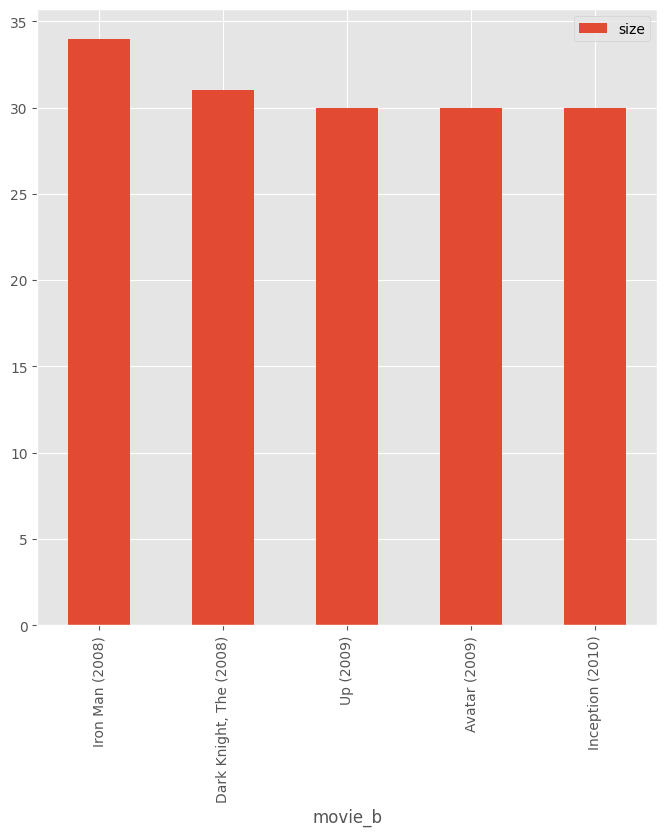

In [30]:
# Sort the counts from highest to lowest
combination_counts_df = combination_counts_df.sort_values('size', ascending=False)

# Find the movies most frequently watched by people who watched Thor
#thor_df = combination_counts_df[combination_counts_df['movie_a'] == 'Thor']
# Use a regular expression to find rows where 'movie_a' contains 'Thor'
thor_df = combination_counts_df[combination_counts_df['movie_a'].str.contains(r'Thor', case=False)]

# Select only the top 5 results
thor_top5_df = thor_df.head(5)

# Check if thor_top5_df is empty (light regex was required so this is an exeption handler if-statement)
if not thor_top5_df.empty:
    thor_top5_df.plot.bar(x="movie_b")
    plt.show()
else:
    print("No data found for 'Thor'.")


Good work! You can see that `Iron Man` was the most commonly watched movie by those who watched `Thor`. This means that it would be a good movie to recommend `Thor` watchers to as it shows they have similar fans.